In [1]:
import or_gym
import gym
from gym import spaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
env = or_gym.make('InvManagement-v2')

In [4]:
env.action_space.sample()

array([3772, 2331, 3760, 2791], dtype=int32)

In [5]:
env.observation_space.shape

(44,)

In [6]:
env.reorder_links

[(2, 1), (3, 2), (4, 3), (5, 4)]

In [56]:
class SimpleNetwork:
    
    def __init__(self):
        
        self.adjacency_matrix = np.array([
            [0, 1], [0, 2], [0, 3], # Retail connections
            [1, 4], [1, 5], [2, 4], [3, 5], # Distr connections
            [4, 6], [5, 6]]) # Factory connections
        self.node_levels = {'retailer': [0],
                            'distributor': [1, 2, 3],
                            'factory': [4, 5],
                            'resources': [6]}
        self.nodes = np.unique(self.adjacency_matrix)
        self.num_nodes = len(self.nodes)
        self.supply_capacities = np.repeat(100, self.num_nodes)
        self.inventory_capacities = np.repeat(200, self.num_nodes)
    
    def reset(self):
        pass
    
    def step(self):
        pass
        
    def plot_network(self):
        plt.figure(figsize=(12,8))
        max_density = max([len(i) for i in self.node_levels.values()])
        node_coords = []
        node_num = 0
        # Draw nodes
        for i, (level, nodes) in enumerate(self.node_levels.items()):
            n = len(nodes)
            node_y = max_density / np.array([2]) if n == 1 else np.linspace(0, max_density, n)
            plt.scatter(np.repeat(i, n), node_y, label=level, s=50)

            for y in node_y:
                plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y + 0.05))
                node_coords.append((node_num, i, y))
                node_num += 1

        # Draw edges
        for node_num, x, y in node_coords:
            cons = self.adjacency_matrix[np.where(self.adjacency_matrix[:,0]==node_num)[0], 1]
            for c in cons:
                con_coord = node_coords[c]
                if len(con_coord) == 0:
                    continue
                x_ = np.hstack([x, con_coord[1]])
                y_ = np.hstack([y, con_coord[2]])
                plt.plot(x_, y_)

        plt.ylabel('Node')
        plt.yticks([0], [''])
        plt.xlabel('Level')
        plt.xticks(np.arange(len(self.node_levels)), [k for k in self.node_levels.keys()])
        plt.show()

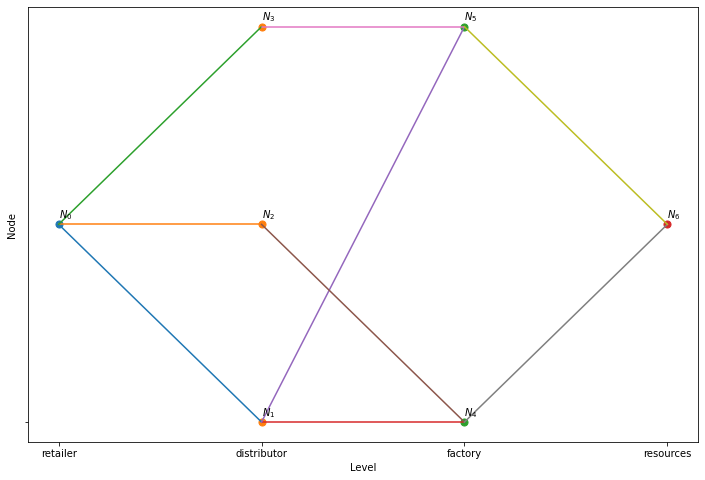

In [57]:
env = SimpleNetwork()
env.plot_network()

In [64]:
# Determine action space
action_dict = {}
for n in env.nodes:
    if n in env.node_levels['resources']:
        continue
    edges = env.adjacency_matrix[np.where(env.adjacency_matrix[:, 0]==n)[0], 1]
    n_edges = len(edges)
    action_dict[n] = spaces.Box(low=np.zeros(n_edges), 
                                high=env.supply_capacities[edges], dtype=np.int32)
    
env.action_space = spaces.Dict(action_dict)

In [65]:
env.action_space.sample()

OrderedDict([(0, array([14,  0, 89], dtype=int32)),
             (1, array([51, 93], dtype=int32)),
             (2, array([56], dtype=int32)),
             (3, array([43], dtype=int32)),
             (4, array([86], dtype=int32)),
             (5, array([32], dtype=int32))])

In [51]:
env.num_nodes

7

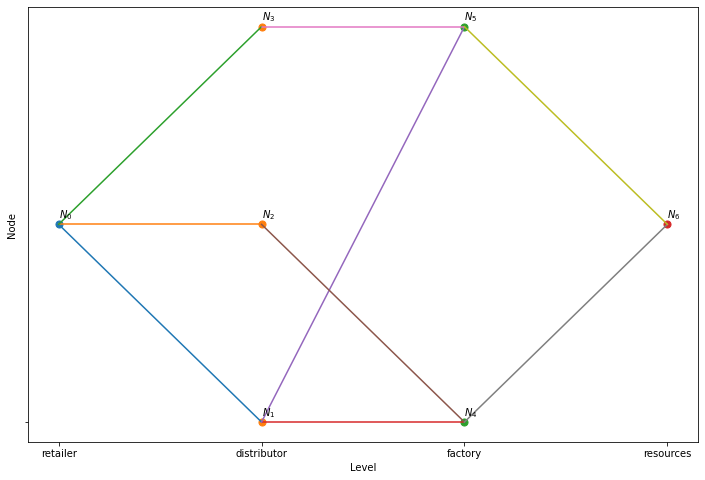

In [45]:
plt.figure(figsize=(12,8))
max_density = max([len(i) for i in env.node_levels.values()])
node_coords = []
node_num = 0
# Draw nodes
for i, (level, nodes) in enumerate(env.node_levels.items()):
    n = len(nodes)
    node_y = max_density / np.array([2]) if n == 1 else np.linspace(0, max_density, n)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50)
    
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y + 0.05))
        node_coords.append((node_num, i, y))
        node_num += 1

# Draw edges
for node_num, x, y in node_coords:
    cons = env.adjacency_matrix[np.where(env.adjacency_matrix[:,0]==node_num)[0], 1]
    for c in cons:
        con_coord = node_coords[c]
        if len(con_coord) == 0:
            continue
        x_ = np.hstack([x, con_coord[1]])
        y_ = np.hstack([y, con_coord[2]])
        plt.plot(x_, y_)
#         print("{} Connects to {}".format(node_num, con_coord[0]))
    
plt.ylabel('Node')
plt.yticks([0], [''])
plt.xlabel('Level')
plt.xticks(np.arange(len(env.node_levels)), [k for k in env.node_levels.keys()])
plt.show()

In [31]:
y_

array([0. , 1.5])